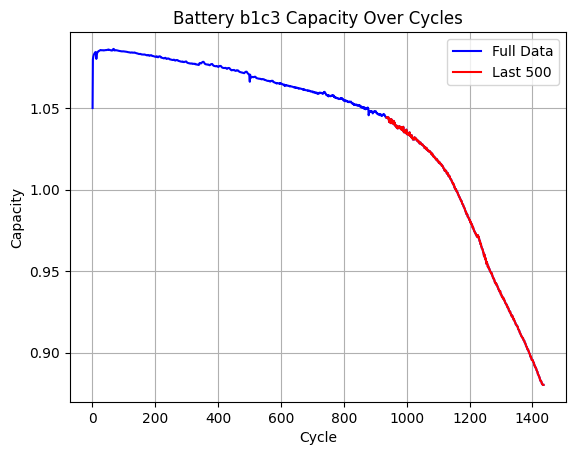

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def load_battery_curve(battery_id):
    try:
        df = pd.read_csv(
            f"resources/raw/{battery_id}.txt",
            header=None,
            names=['capacity'],
            engine='python',
            usecols=[0]
        )
        df.dropna(inplace=True)
        trimmed = np.trim_zeros(df["capacity"].values, 'b')
        cycles = np.arange(1, len(trimmed) + 1)
        return pd.DataFrame({"cycle": cycles, "capacity": trimmed})
    except Exception as e:
        print(f"Error loading battery {battery_id}: {e}")
        return None

# Load and plot
battery_id = "b1c3"
df = load_battery_curve(battery_id)

if df is not None:
    plt.figure()
    plt.plot(df["cycle"], df["capacity"], label="Full Data", color="blue")
    plt.plot(df["cycle"].iloc[-500:], df["capacity"].iloc[-500:], color="red", label="Last 500")
    plt.title(f"Battery {battery_id} Capacity Over Cycles")
    plt.xlabel("Cycle")
    plt.ylabel("Capacity")
    plt.legend()
    plt.grid(True)
    plt.show()
